In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as   plt
%matplotlib inline

In [83]:
dataset =pd.read_csv("C:/Users/shrey/Downloads/SCLC_study_output_filtered.csv")

In [84]:
data1=dataset.drop(dataset.columns[0], axis=1)

In [85]:
data1.as_matrix()
VarT=0.0
for each in data1.columns:
    col1= data1[each]
    VarT= VarT + np.var(col1)

In [86]:
CovMatrix=np.cov(data1.T)
CovMatrix.shape

(49, 49)

In [87]:
Val,Vect=np.linalg.eig(CovMatrix)

In [88]:
sort=Val.argsort()[::-1]
Val = Val[sort]
Vect =Vect[:, sort]

In [89]:
Y=np.matmul(data1,Vect)

In [90]:
#Covariance Between PC1 and PC2
CovpCs=np.cov(Vect[:,0],Vect[:,1])
print("Covariance between PC1 and PC2 is")
print(CovpCs)

Covariance between PC1 and PC2 is
[[ 0.01859618+0.j  0.00277417+0.j]
 [ 0.00277417+0.j  0.01739323+0.j]]


In [91]:
#VAriance before PCA
print("Total variance before PCA")
print(VarT)
#Variance after PCA
TotalVarAV=np.sum(Val)
print("Total variance after PCA")
print(TotalVarAV)

Total variance before PCA
3274592567846.942
Total variance after PCA
(3.35855647984e+12+0j)


C:\Users\shrey\Anaconda3\lib\site-packages\numpy\core\numeric.py:533: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\shrey\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


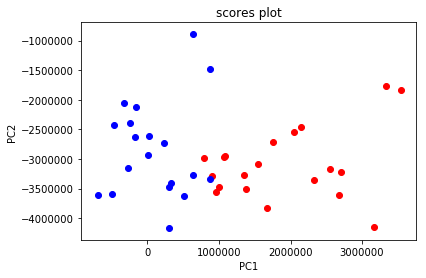

In [92]:
#Score PLot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('scores plot')
ax.scatter(Y[0:20,0], Y[0:20,1], color='red')
ax.scatter(Y[21:49,0],Y[21:49,1], color='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.show()

C:\Users\shrey\Anaconda3\lib\site-packages\numpy\core\numeric.py:533: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\shrey\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


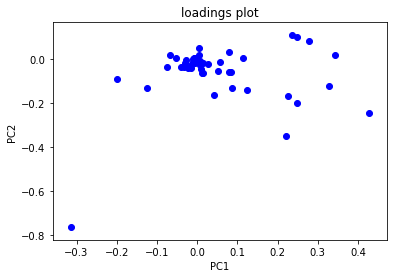

In [93]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('loadings plot')
ax.scatter(Vect[:,0], Vect[:,1], color='blue')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.show()

In [95]:
percentVarianceExplained = 100 * Val[0] /TotalVarAV
print ("PC1 explains: " + str(round(percentVarianceExplained, 2)) + '% variance\n')
percentVarianceExplained = 100 * Val[1] /TotalVarAV
print ("PC2 explains: " + str(round(percentVarianceExplained, 2)) + '% variance\n')
percentVarianceExplained = 100 * Val[2] /TotalVarAV
print ("PC3 explains: " + str(round(percentVarianceExplained, 2)) + '% variance\n')
percentVarianceExplained = 100 * Val[3] /TotalVarAV
print ("PC4 explains: " + str(round(percentVarianceExplained, 2)) + '% variance\n')
#percentVarianceExplained = 100 * Val[4] /TotalVarAV
#print ("PC5 explains: " + str(round(percentVarianceExplained, 2)) + '% variance\n')
print("The first 4 principal components explain 76.53% of the variance in the data")

PC1 explains: (40.06+0j)% variance

PC2 explains: (14.91+0j)% variance

PC3 explains: (13+0j)% variance

PC4 explains: (9.53+0j)% variance

The first 4 principal components explain 76.53% of the variance in the data


   Second Part- Running PCA on normalized matrix
   

In [96]:
#Normalizeddata
columnMean = data1.mean(axis=0)
MeanCentrMat= data1-columnMean
CovMatrix1=np.cov(MeanCentrMat.T)
Val2,Vect2=np.linalg.eig(CovMatrix1)
Y2=np.matmul(data1,Vect2)

TotVarNorm=0.0
for each in MeanCentrMat.columns:
    col1= MeanCentrMat[each]
    TotVarNorm= TotVarNorm + np.var(col1)
    
       
#Variance after PCA
TotalVarNormAV=np.sum(Val2)
print("Total variance before PCA")
print(TotVarNorm)
print("Total variance after PCA")
print(TotalVarNormAV)

Total variance before PCA
3274592567846.9414
Total variance after PCA
(3.35855647984e+12+0j)
